In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Important notes about Titanic
- `Sib Sp` : `Sib`:sibling means (brother or sister ) : `Sp` :Spouse means husbund or wife
- `Parch`  : `Par`: parents : `Ch` : Children
- `Pclass` : `1` upper class / `2` midium / `3` lower class
-`Emparked`: `S` ,`C` or `Q` refers to Sites from which to board on Titanic

## what is number of Males & females ?

#### solved by 2 ways

In [28]:
#1
(df['Sex'].value_counts()/len(df))

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [13]:
#2
df['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [19]:
df['Name'].duplicated().sum()

0

### Unique values for a column and its occurances

In [23]:
#1
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [22]:
#2
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## investigate and find missing data

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## finding number of survived males and females

#### solved by 3 ways

In [58]:
#1
survived_males = ((df['Survived']==1) & (df['Sex']=='male')).sum()
survived_females=((df['Survived']==1) & (df['Sex']=='female')).sum()
print(survived_males,survived_females )

109 233


In [151]:
#2
groups = df.groupby(['Sex'])
groups.sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,135343,233,678,7286.00,218,204,13966.6628
male,262043,109,1379,13919.17,248,136,14727.2865


## Percentage of survived and unsurvived for both gender

In [63]:
df.groupby(['Sex'])['Survived'].value_counts(normalize=True).plot(kind='bar')

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

#### plotting it using 2 ways 

<AxesSubplot:xlabel='Sex,Survived'>

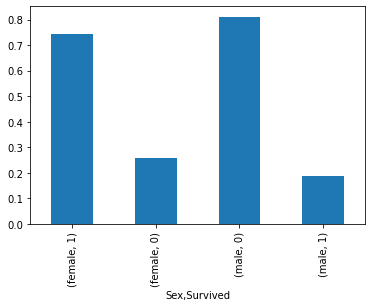

In [81]:
#1
df.groupby(['Sex'])['Survived'].value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:xlabel='Survived', ylabel='count'>

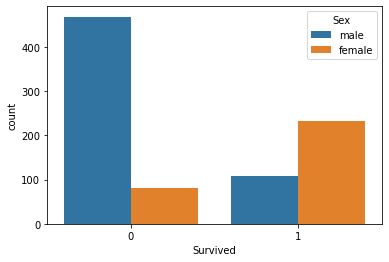

In [22]:
#2
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df,x='Survived',hue='Sex')

## average of fare for every calss

In [86]:
df.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

## Ages

<AxesSubplot:xlabel='Age', ylabel='Count'>

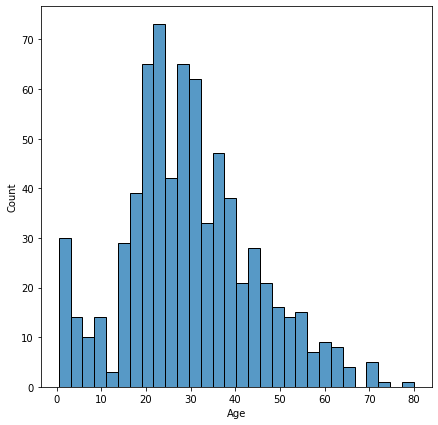

In [93]:
plt.figure(figsize=(7,7))
sns.histplot(data=df['Age'],kde=False,bins=30)

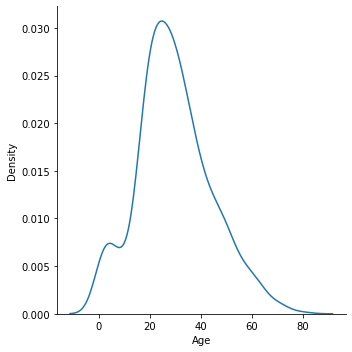

In [92]:
sns.displot(data=df['Age'],kind='kde')

<AxesSubplot:xlabel='Survived'>

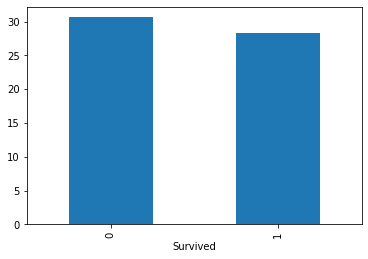

In [99]:
df.groupby(['Survived'])['Age'].mean().plot(kind='bar')

## get max aged person on titanic

In [102]:
df['Age'].max()

80.0

#### solved using 3 ways

In [150]:
#1
df[df['Age']==80]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [161]:
2#
i=df['Age'].isin([80])
df.loc[i]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [154]:
3#
a=df
a.set_index('Age',inplace=True)
df.loc[80]

KeyError: "None of ['Age'] are in the columns"

In [156]:
df = pd.read_csv('titanic.csv')

## to know if this person survived or not

#### solved using 2 ways

In [159]:
1#
df[df['Age']==df['Age'].max()]['Survived']

630    1
Name: Survived, dtype: int64

In [162]:
2#
i=df['Age'].isin([80])
df.loc[i]['Survived']

630    1
Name: Survived, dtype: int64

## draw distribution of age,survived  ,sex  

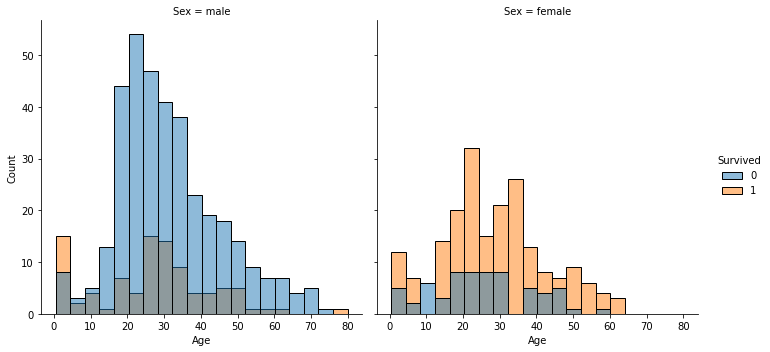

In [166]:
sns.displot(data=df,x='Age',hue='Survived',col='Sex')


## number of survived  and not survived people for each class

In [7]:
df.groupby(['Pclass'])['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

## family size


In [8]:
df['family']=df['SibSp']+df['Parch']+1

In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


## number of survived families for each class

In [14]:
df.groupby(['Pclass'])['family'].sum()

Pclass
1    383
2    328
3    986
Name: family, dtype: int64

In [16]:
df.groupby(['Survived'])['family'].sum()

Survived
0    1034
1     663
Name: family, dtype: int64

<AxesSubplot:xlabel='Pclass,Survived'>

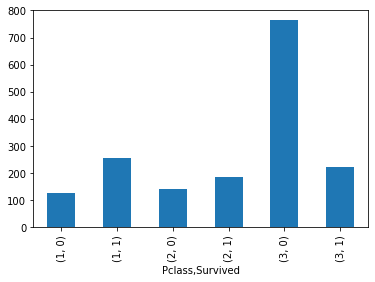

In [24]:
df.groupby(['Pclass','Survived'])['family'].sum().plot(kind='bar')

## number of survived people from each class

<AxesSubplot:xlabel='Pclass', ylabel='count'>

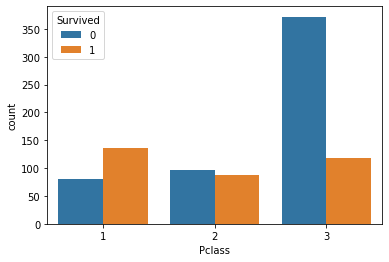

In [33]:
sns.countplot(data=df,x='Pclass',hue='Survived')

## number of survived males and females from each class

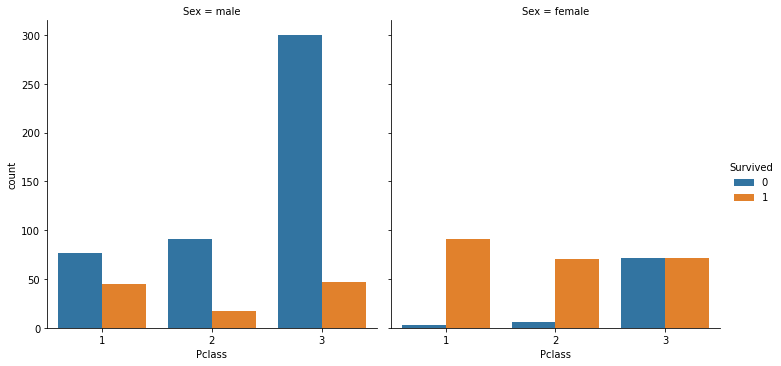

In [37]:
#count plot using 3 variables
sns.catplot(data=df,x='Pclass',hue='Survived',col='Sex',kind='count')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

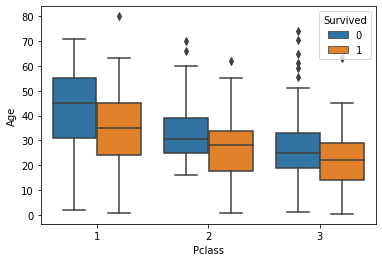

In [39]:
sns.boxplot(x='Pclass',y='Age',hue='Survived',data=df)

## what we got from previous figure:
    
- people with high age always dead in all calsses due to the high average in boxplot
- a pattern appears and show that : the smaller the class the larger the age 

<AxesSubplot:>

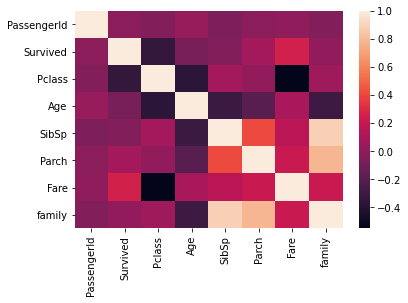

In [42]:
sns.heatmap(data=df.corr())

<AxesSubplot:>

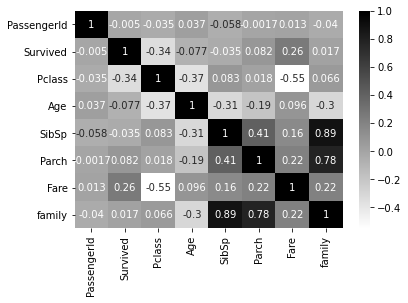

In [48]:
sns.heatmap(data=df.corr(),annot=True, cmap='binary')#cmap='RdBu_r'

### from last figure it seems that family column is valueless due to its corr coef weak when comparing with  Parch and SibSp